In [1]:
#!pip install wordcloud
#!pip install langdetect

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import spacy                                                 
from spacy.lang.en import English  
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
nlp = spacy.load("en_core_web_sm")  
from nltk import pos_tag
nltk.download('wordnet')
from langdetect import detect_langs
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [87]:
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [3]:
nltk.download('vader_lexicon')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
data = pd.read_csv('dataset/final/reviews.csv')

In [5]:
data.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


In [8]:
len(data['reviewer_id'].unique())

75717

In [9]:
len(data['id'].unique())

84831

In [10]:
len(data['listing_id'].unique())

3191

In [11]:
data["listing_id"].value_counts() 

208356      474
365550      466
25002       404
47196       353
63308       320
           ... 
7922663       1
7027507       1
8508223       1
10118341      1
9727246       1
Name: listing_id, Length: 3191, dtype: int64

In [12]:
data["date"].value_counts() 

2015-09-21    580
2015-08-07    400
2015-09-07    384
2015-08-10    383
2015-08-31    371
             ... 
2010-11-17      1
2012-10-27      1
2009-06-07      1
2009-06-28      1
2012-01-07      1
Name: date, Length: 1929, dtype: int64

In [13]:
reviews_corpus = ' '.join(data['comments'])

In [14]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS 

In [15]:
len(stop_words)

326

In [16]:
type(stop_words)

set

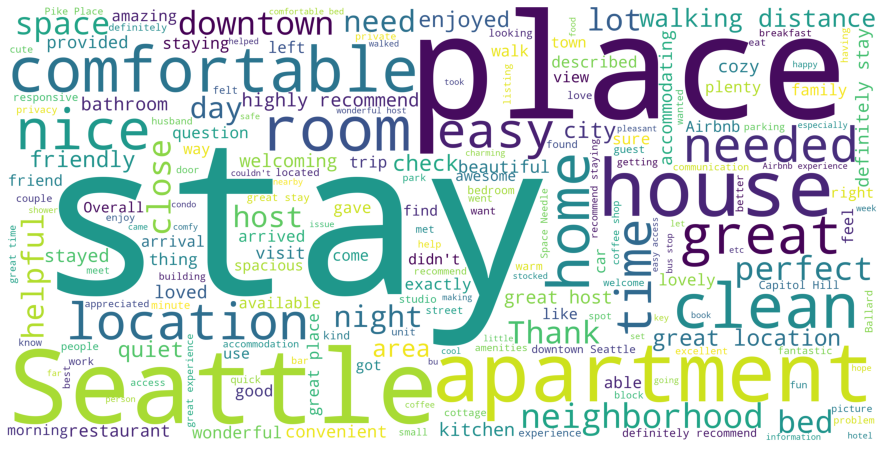

In [17]:
name_wordcloud = WordCloud(stopwords = stop_words, background_color = 'white', 
                           height = 2000, width = 4000).generate(reviews_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

In [18]:
new_stopword = stop_words

In [19]:
new_stopword.add('Seattle')

In [20]:
len(STOPWORDS)

192

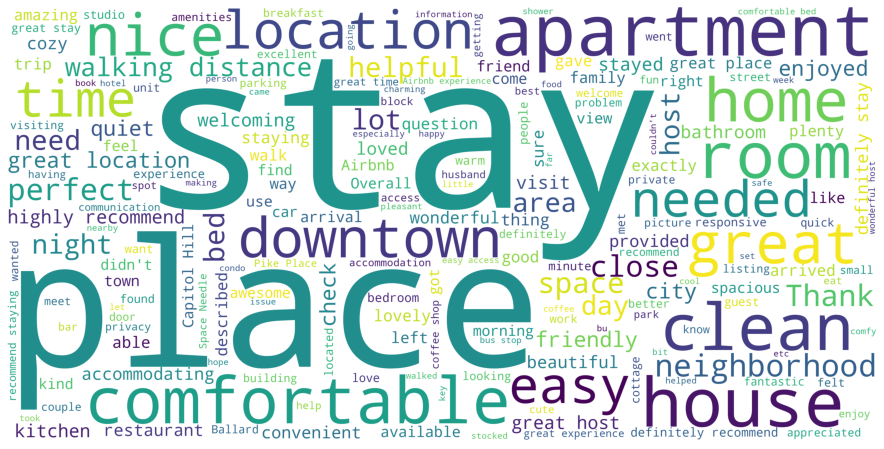

In [21]:
name_wordcloud = WordCloud(stopwords = new_stopword, background_color = 'white', 
                           height = 2000, width = 4000).generate(reviews_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

In [22]:
def detect_language(text):
    try:
        return(str(detect_langs(text))[1:3])
    except:
        language = "error"
    return ('This comments has error')

In [23]:
def clean_text(text):
    text = text.lower()
    text = word_tokenize(text)
    text = [word for word in text if word.isalpha()]
    stop_words = spacy.lang.en.stop_words.STOP_WORDS 
    text = [word for word in text if word not in stop_words]
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

def sentiment_lables(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [24]:
data

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


In [25]:
data

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


In [26]:
data.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [27]:
data['language'] = data['comments'].apply(detect_language)

In [28]:
data

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,en
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,en
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",en
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,en
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,en
...,...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,en
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,en
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del...",es
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si...",en


In [29]:
data[data.language!='en'].index

Int64Index([   80,   288,   301,   386,   404,   458,   494,   537,   589,
              641,
            ...
            83944, 83953, 84066, 84071, 84117, 84121, 84217, 84338, 84378,
            84846],
           dtype='int64', length=1045)

In [30]:
en_data = data.drop(data[data.language!='en'].index)

In [31]:
en_data

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,en
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,en
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",en
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,en
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,en
...,...,...,...,...,...,...,...
84843,3624990,49768901,2015-10-06,37578535,Michael,Comfortability upon arrival and everything wit...,en
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,en
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,en
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si...",en


In [32]:
en_data['comments_cleaned'] = en_data['comments'].apply(clean_text)

In [33]:
en_data['language'].value_counts()

en    83786
Name: language, dtype: int64

In [34]:
en_data.dropna(inplace=True)

In [35]:
en_data.keys()

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'language', 'comments_cleaned'],
      dtype='object')

In [37]:
en_data

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,comments_cleaned
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,en,cute cozy place perfect location
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,en,kelly great room central location beautiful bu...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",en,spacious apartment great neighborhood kind apa...
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,en,close seattle center offer ballet theater muse...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,en,kelly great host accommodating great neighborh...
...,...,...,...,...,...,...,...,...
84843,3624990,49768901,2015-10-06,37578535,Michael,Comfortability upon arrival and everything wit...,en,comfortability arrival walking distance settle...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,en,description picture apartment exactly received...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,en,excellent stay clean comfortable convenient co...
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si...",en,good apartement clean sized situated convensio...


In [38]:
polarity_score = SentimentIntensityAnalyzer()
sentiments = en_data["comments_cleaned"].apply(lambda x: polarity_score.polarity_scores(x))
en_data = pd.concat([en_data, sentiments.apply(pd.Series)], axis=1)

In [39]:
en_data

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,comments_cleaned,neg,neu,pos,compound
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,en,cute cozy place perfect location,0.000,0.309,0.691,0.7717
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,en,kelly great room central location beautiful bu...,0.000,0.470,0.530,0.9858
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",en,spacious apartment great neighborhood kind apa...,0.064,0.487,0.449,0.9325
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,en,close seattle center offer ballet theater muse...,0.087,0.601,0.312,0.7579
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,en,kelly great host accommodating great neighborh...,0.000,0.429,0.571,0.9738
...,...,...,...,...,...,...,...,...,...,...,...,...
84843,3624990,49768901,2015-10-06,37578535,Michael,Comfortability upon arrival and everything wit...,en,comfortability arrival walking distance settle...,0.054,0.491,0.455,0.9460
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,en,description picture apartment exactly received...,0.028,0.704,0.268,0.9360
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,en,excellent stay clean comfortable convenient co...,0.000,0.531,0.469,0.8658
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si...",en,good apartement clean sized situated convensio...,0.162,0.509,0.329,0.6808


In [40]:
en_data['labels'] = en_data['compound'].apply(sentiment_lables)

In [41]:
en_data

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,comments_cleaned,neg,neu,pos,compound,labels
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,en,cute cozy place perfect location,0.000,0.309,0.691,0.7717,positive
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,en,kelly great room central location beautiful bu...,0.000,0.470,0.530,0.9858,positive
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",en,spacious apartment great neighborhood kind apa...,0.064,0.487,0.449,0.9325,positive
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,en,close seattle center offer ballet theater muse...,0.087,0.601,0.312,0.7579,positive
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,en,kelly great host accommodating great neighborh...,0.000,0.429,0.571,0.9738,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84843,3624990,49768901,2015-10-06,37578535,Michael,Comfortability upon arrival and everything wit...,en,comfortability arrival walking distance settle...,0.054,0.491,0.455,0.9460,positive
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,en,description picture apartment exactly received...,0.028,0.704,0.268,0.9360,positive
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,en,excellent stay clean comfortable convenient co...,0.000,0.531,0.469,0.8658,positive
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si...",en,good apartement clean sized situated convensio...,0.162,0.509,0.329,0.6808,positive


In [42]:
en_data.labels.value_counts()

positive    82349
neutral      1139
negative      298
Name: labels, dtype: int64

In [43]:
en_data[en_data.labels=='negative']

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,comments_cleaned,neg,neu,pos,compound,labels
189,3242605,20289302,2014-09-27,19811857,Ivaylo,"Cozy and very private space! Close to beach, s...",en,cozy private space close beach shopping main s...,0.114,0.886,0.000,-0.3197,negative
1058,931758,43443651,2015-08-19,11046870,Joanie,The location was superb. The building staff we...,en,location superb building staff friendly helpfu...,0.170,0.680,0.150,-0.4767,negative
1061,931758,57459293,2015-12-26,29602367,Esther,This unit is akin to longterm corporate housin...,en,unit akin longterm corporate housing condo uni...,0.172,0.682,0.145,-0.4364,negative
1598,208356,911686,2012-02-10,1413031,Edward,Very conveniently located near buses and the d...,en,conveniently located near bus downtown room co...,0.153,0.710,0.137,-0.0772,negative
1630,208356,1310641,2012-05-20,2121287,Teresa,Just like the pictures! Nothing to hide.. not...,en,like picture hide dirty spot problem restroom ...,0.485,0.420,0.095,-0.8481,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83221,2660384,17193453,2014-08-08,17614742,Adria,I am always inclined to say nice things becaus...,en,inclined nice thing want hurt place pale inclu...,0.115,0.788,0.096,-0.4098,negative
83465,953595,30231665,2015-04-19,30020119,Sonia,Just stayed a couple of night at Andrea's plac...,en,stayed couple night andrea place apartment des...,0.129,0.759,0.112,-0.1027,negative
83496,3916050,25650438,2015-01-21,25892250,Michele,Pros: I got lots of privacy. The room was clea...,en,pro got lot privacy room clean towel provided ...,0.295,0.514,0.192,-0.4588,negative
83977,7326419,50297380,2015-10-11,42295674,Vladislav,Julie was very accommodating. My girlfriend an...,en,julie accommodating girlfriend flight delayed ...,0.192,0.808,0.000,-0.2263,negative


In [44]:
reviews_corpus = ' '.join(en_data['comments_cleaned'])

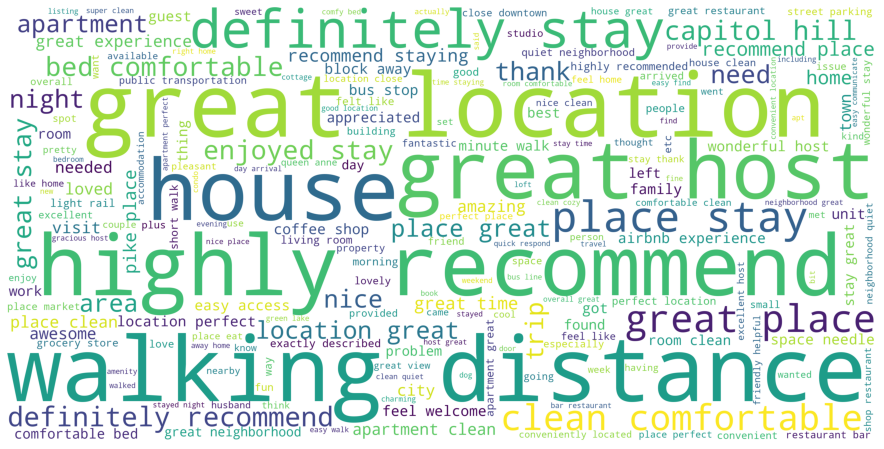

In [45]:
name_wordcloud = WordCloud(stopwords = stop_words, background_color = 'white', 
                           height = 2000, width = 4000).generate(reviews_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

In [46]:
reviews_corpus = ' '.join(en_data[en_data.labels=='negative']['comments_cleaned'])

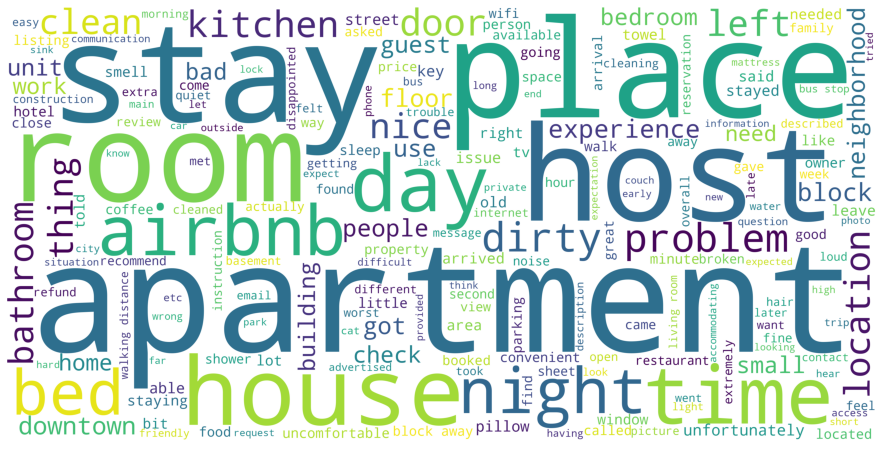

In [47]:
name_wordcloud = WordCloud(stopwords = stop_words, background_color = 'white', 
                           height = 2000, width = 4000).generate(reviews_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

In [48]:
en_data.keys()

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'language', 'comments_cleaned', 'neg', 'neu', 'pos', 'compound',
       'labels'],
      dtype='object')

In [49]:
en_data.reviewer_id.value_counts()

206203      67
15121499    32
2734499     19
29590276    18
5775807     18
            ..
2356720      1
2731547      1
2921760      1
914638       1
30860360     1
Name: reviewer_id, Length: 74779, dtype: int64

In [267]:
en_data

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,comments_cleaned,neg,neu,pos,compound,labels
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,en,cute cozy place perfect location,0.000,0.309,0.691,0.7717,positive
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,en,kelly great room central location beautiful bu...,0.000,0.470,0.530,0.9858,positive
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",en,spacious apartment great neighborhood kind apa...,0.064,0.487,0.449,0.9325,positive
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,en,close seattle center offer ballet theater muse...,0.087,0.601,0.312,0.7579,positive
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,en,kelly great host accommodating great neighborh...,0.000,0.429,0.571,0.9738,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84843,3624990,49768901,2015-10-06,37578535,Michael,Comfortability upon arrival and everything wit...,en,comfortability arrival walking distance settle...,0.054,0.491,0.455,0.9460,positive
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,en,description picture apartment exactly received...,0.028,0.704,0.268,0.9360,positive
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,en,excellent stay clean comfortable convenient co...,0.000,0.531,0.469,0.8658,positive
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si...",en,good apartement clean sized situated convensio...,0.162,0.509,0.329,0.6808,positive


In [268]:
final_data  = en_data.drop(['reviewer_name','comments_cleaned','language'],axis=1)

In [269]:
final_data

,listing_id,id,date,reviewer_id,comments,neg,neu,pos,compound,labels
0,7202016,38917982,2015-07-19,28943674,Cute and cozy place. Perfect location to every...,0.000,0.309,0.691,0.7717,positive
1,7202016,39087409,2015-07-20,32440555,Kelly has a great room in a very central locat...,0.000,0.470,0.530,0.9858,positive
2,7202016,39820030,2015-07-26,37722850,"Very spacious apartment, and in a great neighb...",0.064,0.487,0.449,0.9325,positive
3,7202016,40813543,2015-08-02,33671805,Close to Seattle Center and all it has to offe...,0.087,0.601,0.312,0.7579,positive
4,7202016,41986501,2015-08-10,34959538,Kelly was a great host and very accommodating ...,0.000,0.429,0.571,0.9738,positive
...,...,...,...,...,...,...,...,...,...,...
84843,3624990,49768901,2015-10-06,37578535,Comfortability upon arrival and everything wit...,0.054,0.491,0.455,0.9460,positive
84844,3624990,50436321,2015-10-12,37419458,The description and pictures of the apartment ...,0.028,0.704,0.268,0.9360,positive
84845,3624990,51024875,2015-10-17,6933252,We had an excellent stay. It was clean and com...,0.000,0.531,0.469,0.8658,positive
84847,3624990,52814482,2015-11-02,24445024,"Very good apartement, clean and well sized. Si...",0.162,0.509,0.329,0.6808,positive


In [270]:
seattle = pd.read_csv('dataset/final/Seattle_cleaned_data.csv')

In [271]:
seattle.isnull().sum()

Unnamed: 0                          0
id                                  0
listing_url                         0
scrape_id                           0
last_scraped                        0
                                   ..
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
Length: 90, dtype: int64

In [129]:
def uni_count_plot(df,col):
    plt.figure(figsize=(15,7))
    ax=sns.countplot(df[col],linewidth=3,order= df[col].value_counts().index,palette="Spectral")
    for bar in ax.patches:
        h= bar.get_height()
        x= bar.get_x()+bar.get_width()/2
        ax.annotate(h, (x, h), va = "bottom", ha ="center" )
    plt.tight_layout()

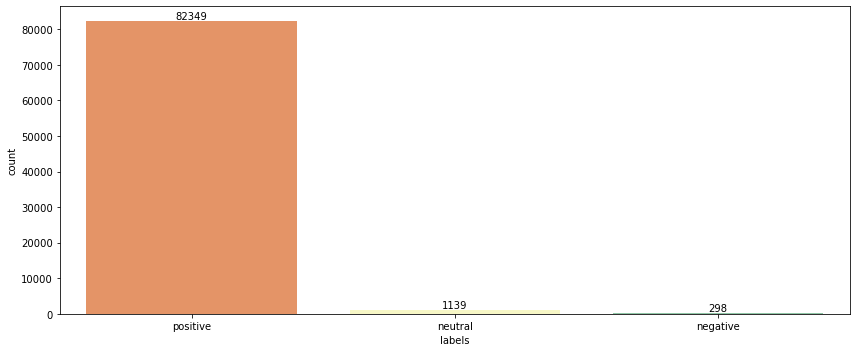

In [55]:
uni_count_plot(final_data,'labels')

In [56]:
seattle.keys()

Index(['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
 

In [57]:
seattle.instant_bookable.value_counts()

0    3213
1     589
Name: instant_bookable, dtype: int64

In [274]:
cols=['id','host_response_time','host_response_rate', 'host_acceptance_rate', 'host_is_superhost','neighbourhood_group_cleansed',
     'latitude', 'longitude','property_type', 'room_type', 'accommodates','bedrooms','amenities', 'price','guests_included','cleaning_fee',
     'review_scores_value','instant_bookable', 'cancellation_policy','reviews_per_month']

In [275]:
df = seattle[cols]

In [276]:
merged_data = pd.merge(left=final_data,right=df,how='inner',left_on='listing_id',right_on='id')

In [277]:
merged_data

,listing_id,id_x,date,reviewer_id,comments,neg,neu,pos,compound,labels,...,accommodates,bedrooms,amenities,price,guests_included,cleaning_fee,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
0,7202016,38917982,2015-07-19,28943674,Cute and cozy place. Perfect location to every...,0.000,0.309,0.691,0.7717,positive,...,2,1.0,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75.0,1,15.0,10.0,1,flexible,2.82
1,7202016,39087409,2015-07-20,32440555,Kelly has a great room in a very central locat...,0.000,0.470,0.530,0.9858,positive,...,2,1.0,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75.0,1,15.0,10.0,1,flexible,2.82
2,7202016,39820030,2015-07-26,37722850,"Very spacious apartment, and in a great neighb...",0.064,0.487,0.449,0.9325,positive,...,2,1.0,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75.0,1,15.0,10.0,1,flexible,2.82
3,7202016,40813543,2015-08-02,33671805,Close to Seattle Center and all it has to offe...,0.087,0.601,0.312,0.7579,positive,...,2,1.0,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75.0,1,15.0,10.0,1,flexible,2.82
4,7202016,41986501,2015-08-10,34959538,Kelly was a great host and very accommodating ...,0.000,0.429,0.571,0.9738,positive,...,2,1.0,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75.0,1,15.0,10.0,1,flexible,2.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83572,3624990,49768901,2015-10-06,37578535,Comfortability upon arrival and everything wit...,0.054,0.491,0.455,0.9460,positive,...,6,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175.0,1,135.0,9.0,1,moderate,1.15
83573,3624990,50436321,2015-10-12,37419458,The description and pictures of the apartment ...,0.028,0.704,0.268,0.9360,positive,...,6,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175.0,1,135.0,9.0,1,moderate,1.15
83574,3624990,51024875,2015-10-17,6933252,We had an excellent stay. It was clean and com...,0.000,0.531,0.469,0.8658,positive,...,6,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175.0,1,135.0,9.0,1,moderate,1.15
83575,3624990,52814482,2015-11-02,24445024,"Very good apartement, clean and well sized. Si...",0.162,0.509,0.329,0.6808,positive,...,6,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175.0,1,135.0,9.0,1,moderate,1.15


In [62]:
merged_data.review_scores_value.value_counts()

10.000000    44645
9.000000     36594
8.000000      2072
7.000000       192
6.000000        33
9.452471        32
4.000000         6
5.000000         2
2.000000         1
Name: review_scores_value, dtype: int64

In [63]:
merged_data

,listing_id,id_x,reviewer_id,comments,neg,neu,pos,compound,labels,id_y,...,accommodates,bedrooms,amenities,price,guests_included,cleaning_fee,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
0,7202016,38917982,28943674,Cute and cozy place. Perfect location to every...,0.000,0.309,0.691,0.7717,positive,7202016,...,2,1.0,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75.0,1,15.0,10.0,1,flexible,2.82
1,7202016,39087409,32440555,Kelly has a great room in a very central locat...,0.000,0.470,0.530,0.9858,positive,7202016,...,2,1.0,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75.0,1,15.0,10.0,1,flexible,2.82
2,7202016,39820030,37722850,"Very spacious apartment, and in a great neighb...",0.064,0.487,0.449,0.9325,positive,7202016,...,2,1.0,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75.0,1,15.0,10.0,1,flexible,2.82
3,7202016,40813543,33671805,Close to Seattle Center and all it has to offe...,0.087,0.601,0.312,0.7579,positive,7202016,...,2,1.0,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75.0,1,15.0,10.0,1,flexible,2.82
4,7202016,41986501,34959538,Kelly was a great host and very accommodating ...,0.000,0.429,0.571,0.9738,positive,7202016,...,2,1.0,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75.0,1,15.0,10.0,1,flexible,2.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83572,3624990,49768901,37578535,Comfortability upon arrival and everything wit...,0.054,0.491,0.455,0.9460,positive,3624990,...,6,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175.0,1,135.0,9.0,1,moderate,1.15
83573,3624990,50436321,37419458,The description and pictures of the apartment ...,0.028,0.704,0.268,0.9360,positive,3624990,...,6,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175.0,1,135.0,9.0,1,moderate,1.15
83574,3624990,51024875,6933252,We had an excellent stay. It was clean and com...,0.000,0.531,0.469,0.8658,positive,3624990,...,6,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175.0,1,135.0,9.0,1,moderate,1.15
83575,3624990,52814482,24445024,"Very good apartement, clean and well sized. Si...",0.162,0.509,0.329,0.6808,positive,3624990,...,6,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175.0,1,135.0,9.0,1,moderate,1.15


In [278]:
merged_data.to_csv('customer_merged_data_date.csv')

In [65]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83577 entries, 0 to 83576
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   listing_id                    83577 non-null  int64  
 1   id_x                          83577 non-null  int64  
 2   reviewer_id                   83577 non-null  int64  
 3   comments                      83577 non-null  object 
 4   neg                           83577 non-null  float64
 5   neu                           83577 non-null  float64
 6   pos                           83577 non-null  float64
 7   compound                      83577 non-null  float64
 8   labels                        83577 non-null  object 
 9   id_y                          83577 non-null  int64  
 10  host_response_time            83577 non-null  int64  
 11  host_response_rate            83577 non-null  float64
 12  host_acceptance_rate          83577 non-null  float64
 13  h

In [66]:
merged_data.cancellation_policy.value_counts()

moderate    36096
strict      33474
flexible    14007
Name: cancellation_policy, dtype: int64

In [67]:
merged_data.instant_bookable.value_counts()

0    64404
1    19173
Name: instant_bookable, dtype: int64

In [68]:
merged_data["Total_Cost"]= merged_data.price + merged_data.cleaning_fee
merged_data["Total_Capacity"]= merged_data.accommodates + merged_data.guests_included

In [69]:
merged_data.drop(["price","cleaning_fee","accommodates","guests_included"],axis = 1,inplace=True)

In [70]:
merged_data.keys()

Index(['listing_id', 'id_x', 'reviewer_id', 'comments', 'neg', 'neu', 'pos',
       'compound', 'labels', 'id_y', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'bedrooms', 'amenities',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'reviews_per_month', 'Total_Cost', 'Total_Capacity'],
      dtype='object')

In [234]:
final_df = merged_data.drop(['listing_id', 'id_x', 'comments', 'neg', 'neu', 'pos','id_y','labels','host_response_rate',
'host_acceptance_rate', 'host_is_superhost', 'latitude','neighbourhood_group_cleansed','room_type',
'longitude','amenities','cancellation_policy','host_response_time','instant_bookable','reviews_per_month','review_scores_value'],axis=1)

In [251]:
merged_data.keys()

Index(['listing_id', 'id_x', 'reviewer_id', 'comments', 'neg', 'neu', 'pos',
       'compound', 'labels', 'id_y', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'bedrooms', 'amenities',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'reviews_per_month', 'Total_Cost', 'Total_Capacity'],
      dtype='object')

In [252]:
seattle.keys()

Index(['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
 

In [235]:
final_df

,reviewer_id,compound,property_type,bedrooms,Total_Cost,Total_Capacity
0,28943674,0.7717,Apartment,1.0,90.0,3
1,32440555,0.9858,Apartment,1.0,90.0,3
2,37722850,0.9325,Apartment,1.0,90.0,3
3,33671805,0.7579,Apartment,1.0,90.0,3
4,34959538,0.9738,Apartment,1.0,90.0,3
...,...,...,...,...,...,...
83572,37578535,0.9460,Apartment,2.0,310.0,7
83573,37419458,0.9360,Apartment,2.0,310.0,7
83574,6933252,0.8658,Apartment,2.0,310.0,7
83575,24445024,0.6808,Apartment,2.0,310.0,7


In [247]:
new_df= final_df.groupby('reviewer_id')['Total_Cost','compound'].mean()

In [258]:
bedroom=final_df.groupby('reviewer_id')['bedrooms'].agg(pd.Series.mode)

In [259]:
new_df['bedrooms']=bedroom

<AxesSubplot:xlabel='Total_Cost', ylabel='compound'>

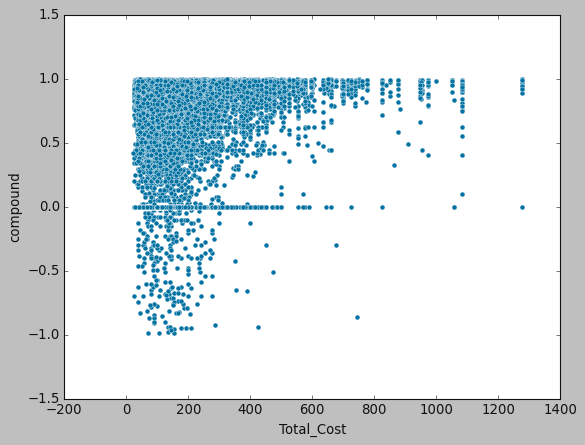

In [248]:
sns.scatterplot(new_df['Total_Cost'],new_df['compound'])

In [261]:
new_df.head()

,Total_Cost,compound,Kmeans_label,bedrooms
reviewer_id,,,,
15,125.0,0.9741,4,1.0
262,140.0,0.8519,4,1.0
431,145.0,0.9442,4,0.0
1618,180.0,0.9915,4,1.0
1720,290.0,0.9708,0,1.0


In [ ]:
#LABEL_COLOR_MAP = {0 : 'fuchsia',1 : '#a6e22e',2 : 'green',3 : 'orange',4 : 'purple', 5 : 'red'}
#label_color = [LABEL_COLOR_MAP[l] for l in labels_kmeans]
fig = plt.figure(figsize = (20, 10))
ax = plt.axes(projection ="3d")
ax.scatter3D(new_df.Total_Cost, new_df.compound, new_df.bedrooms)

ax.set_xlabel("Response Score")
ax.set_ylabel("Verification Score")
ax.set_zlabel("Hosting_Score")

# plt.title("Annual Income vs Spending Score using Kmeans Algorithm")
plt.show()

Error in callback <function flush_figures at 0x000001FF59123310> (for post_execute):


In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter3D(new_df.Total_Cost, new_df.compound, new_df.bedrooms)

Error in callback <function flush_figures at 0x000001FF59123310> (for post_execute):


In [265]:
final_df.shape

(83577, 7)

In [240]:
final_df[['Total_Cost','compound']]

,Total_Cost,compound
0,90.0,0.7717
1,90.0,0.9858
2,90.0,0.9325
3,90.0,0.7579
4,90.0,0.9738
...,...,...
83572,310.0,0.9460
83573,310.0,0.9360
83574,310.0,0.8658
83575,310.0,0.6808


In [80]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.cluster import  AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

In [81]:
scalar = MinMaxScaler()
scaled_data= scalar.fit_transform(final_df)
scaled_data

array([[0.88513514, 0.        , 0.14285714, ..., 0.23083265, 0.05426975,
        0.07142857],
       [0.99309197, 0.        , 0.14285714, ..., 0.23083265, 0.05426975,
        0.07142857],
       [0.96621622, 0.        , 0.14285714, ..., 0.23083265, 0.05426975,
        0.07142857],
       ...,
       [0.9325837 , 0.        , 0.28571429, ..., 0.09315746, 0.22984836,
        0.21428571],
       [0.83930012, 0.        , 0.28571429, ..., 0.09315746, 0.22984836,
        0.21428571],
       [0.98920936, 0.05263158, 0.        , ..., 0.08079143, 0.08778931,
        0.17857143]])

## K-Means

## Elbow Method

Text(0, 0.5, 'wcss')

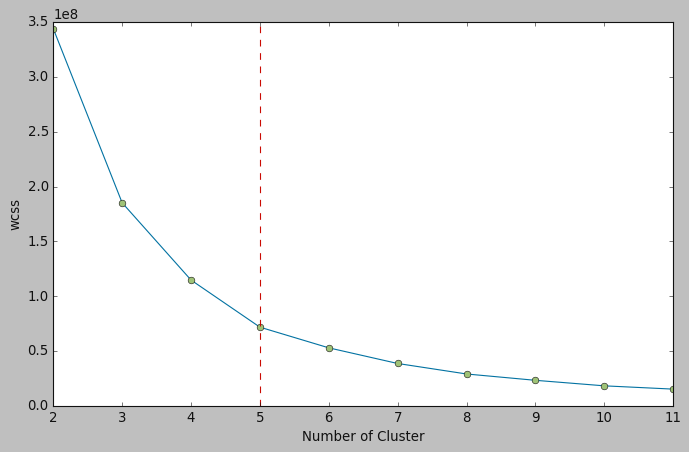

In [241]:
wcss=[]
r= range(2,12)

for i in r:
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init=100)
    kmeans.fit (final_df[['Total_Cost','compound']])
    wcss.append(kmeans.inertia_)
plt.subplots(figsize=(10,6))    
plt.plot(r,wcss)
plt.plot(r,wcss,"o")
plt.axvline(x=5, color='r', linestyle='--')
plt.xlabel("Number of Cluster")
plt.ylabel("wcss")

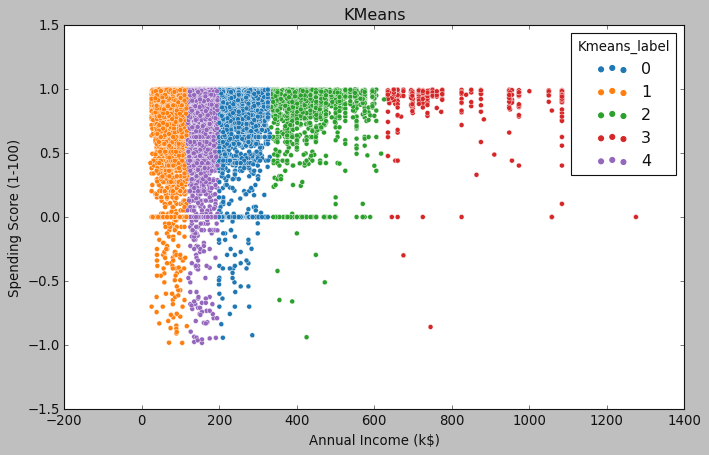

In [250]:
kmeans = KMeans(n_clusters=5)
new_df["Kmeans_label"]= kmeans.fit_predict(new_df[['Total_Cost','compound']])
plt.subplots(figsize=(10,6))
sns.scatterplot(new_df['Total_Cost'],new_df['compound'],hue=new_df["Kmeans_label"],palette='tab10')
plt.title("KMeans")
plt.show()

In [84]:
final_df["Kmeans_label"].value_counts()

0    33826
3    20249
1    18880
2     6590
4     4032
Name: Kmeans_label, dtype: int64

In [88]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(scaled_data)

In [89]:
X_PCA

array([[ 0.76281066,  0.06527431],
       [ 0.7626718 ,  0.06365989],
       [ 0.76270637,  0.0640618 ],
       ...,
       [ 0.74551565,  0.1648113 ],
       [ 0.74563564,  0.16620629],
       [-0.24492295,  0.02139965]])

<AxesSubplot:>

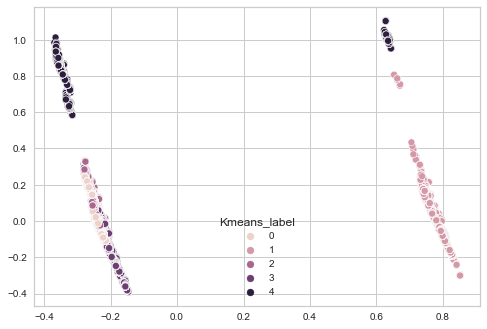

In [90]:
sns.scatterplot(X_PCA[:,0],X_PCA[:,1],hue=final_df["Kmeans_label"])

In [137]:
final_df = merged_data.drop(['listing_id', 'id_x', 'reviewer_id', 'comments', 'neg', 'neu', 'pos','id_y','labels','host_response_rate',
                             'host_acceptance_rate', 'host_is_superhost', 'latitude',
                             'longitude','amenities'],axis=1)

In [138]:
temp = []
for i in final_df["property_type"]:
    if i != "House" and i != "Apartment":
        temp.append("Other")
    else:
        temp.append(i)

In [139]:
final_df["property_type"] = temp

In [140]:
final_df = pd.concat([final_df.drop("room_type", axis=1), pd.get_dummies(final_df["room_type"],
                 prefix="room_type", prefix_sep='', drop_first=True)],axis=1)
final_df = pd.concat([final_df.drop("neighbourhood_group_cleansed", axis=1), pd.get_dummies(final_df["neighbourhood_group_cleansed"],
                 prefix="neighbourhood_group_cleansed", prefix_sep='', drop_first=True)],axis=1)
final_df = pd.concat([final_df.drop("property_type", axis=1), pd.get_dummies(final_df["property_type"],
                 prefix="property_type", prefix_sep='', drop_first=True)],axis=1)
final_df = pd.concat([final_df.drop("cancellation_policy", axis=1), pd.get_dummies(final_df["cancellation_policy"],
                 prefix="cancellation_policy", prefix_sep='', drop_first=True)],axis=1)

In [141]:
final_df

,compound,host_response_time,bedrooms,review_scores_value,instant_bookable,reviews_per_month,Total_Cost,Total_Capacity,room_typePrivate room,room_typeShared room,...,neighbourhood_group_cleansedOther neighborhoods,neighbourhood_group_cleansedQueen Anne,neighbourhood_group_cleansedRainier Valley,neighbourhood_group_cleansedSeward Park,neighbourhood_group_cleansedUniversity District,neighbourhood_group_cleansedWest Seattle,property_typeHouse,property_typeOther,cancellation_policymoderate,cancellation_policystrict
0,0.7717,1,1.0,10.0,1,2.82,90.0,3,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0.9858,1,1.0,10.0,1,2.82,90.0,3,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0.9325,1,1.0,10.0,1,2.82,90.0,3,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0.7579,1,1.0,10.0,1,2.82,90.0,3,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0.9738,1,1.0,10.0,1,2.82,90.0,3,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83572,0.9460,1,2.0,9.0,1,1.15,310.0,7,0,0,...,0,0,0,0,0,0,0,0,1,0
83573,0.9360,1,2.0,9.0,1,1.15,310.0,7,0,0,...,0,0,0,0,0,0,0,0,1,0
83574,0.8658,1,2.0,9.0,1,1.15,310.0,7,0,0,...,0,0,0,0,0,0,0,0,1,0
83575,0.6808,1,2.0,9.0,1,1.15,310.0,7,0,0,...,0,0,0,0,0,0,0,0,1,0


In [217]:
final_df.keys()

Index(['index', 'compound', 'host_response_time', 'bedrooms',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'Total_Cost', 'Total_Capacity', 'room_typePrivate room',
       'room_typeShared room', 'neighbourhood_group_cleansedBeacon Hill',
       'neighbourhood_group_cleansedCapitol Hill',
       'neighbourhood_group_cleansedCascade',
       'neighbourhood_group_cleansedCentral Area',
       'neighbourhood_group_cleansedDelridge',
       'neighbourhood_group_cleansedDowntown',
       'neighbourhood_group_cleansedInterbay',
       'neighbourhood_group_cleansedLake City',
       'neighbourhood_group_cleansedMagnolia',
       'neighbourhood_group_cleansedNorthgate',
       'neighbourhood_group_cleansedOther neighborhoods',
       'neighbourhood_group_cleansedQueen Anne',
       'neighbourhood_group_cleansedRainier Valley',
       'neighbourhood_group_cleansedSeward Park',
       'neighbourhood_group_cleansedUniversity District',
       'neighbourhood_group_c

<AxesSubplot:xlabel='Total_Cost', ylabel='Total_Capacity'>

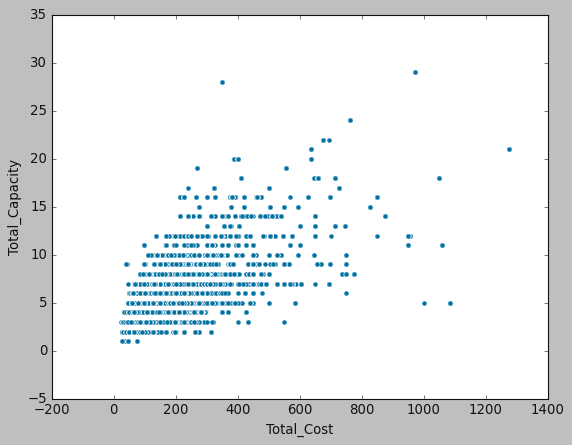

In [221]:
sns.scatterplot(final_df['Total_Cost'],final_df['Total_Capacity'])

In [142]:
scalar = MinMaxScaler()
scaled_data= scalar.fit_transform(final_df)
scaled_data

array([[0.88513514, 0.        , 0.14285714, ..., 0.        , 0.        ,
        0.        ],
       [0.99309197, 0.        , 0.14285714, ..., 0.        , 0.        ,
        0.        ],
       [0.96621622, 0.        , 0.14285714, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9325837 , 0.        , 0.28571429, ..., 0.        , 1.        ,
        0.        ],
       [0.83930012, 0.        , 0.28571429, ..., 0.        , 1.        ,
        0.        ],
       [0.98920936, 0.05263158, 0.        , ..., 0.        , 1.        ,
        0.        ]])

Text(0, 0.5, 'Variance explained')

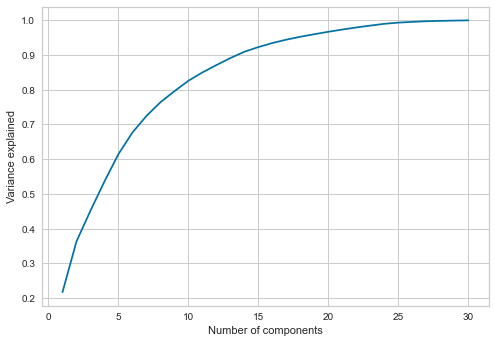

In [146]:
explained_variance = []
for n in range(1,31):
    pca = PCA(n_components = n)
    pca.fit(scaled_data)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))
plt.plot(range(1,31), explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Variance explained')

In [162]:
pca = PCA(n_components=25)
X_PCA = pca.fit_transform(scaled_data)

Text(0, 0.5, 'wcss')

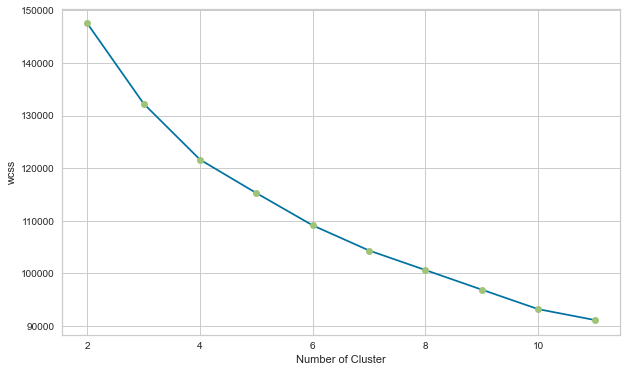

In [164]:
wcss=[]
r= range(2,12)

for i in r:
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init=100)
    kmeans.fit (X_PCA)
    wcss.append(kmeans.inertia_)
plt.subplots(figsize=(10,6))    
plt.plot(r,wcss)
plt.plot(r,wcss,"o")
#plt.axvline(x=5, color='r', linestyle='--')
plt.xlabel("Number of Cluster")
plt.ylabel("wcss")

In [177]:
kmeans = KMeans(n_clusters=4)
final_df["Kmeans_label"]= kmeans.fit_predict(X_PCA)

In [178]:
final_df["Kmeans_label"].value_counts()

3    21984
0    21850
1    20587
2    19156
Name: Kmeans_label, dtype: int64

In [179]:
## For plot

In [181]:
pca = PCA(n_components=2)
X_PCA_2 = pca.fit_transform(scaled_data)

<AxesSubplot:>

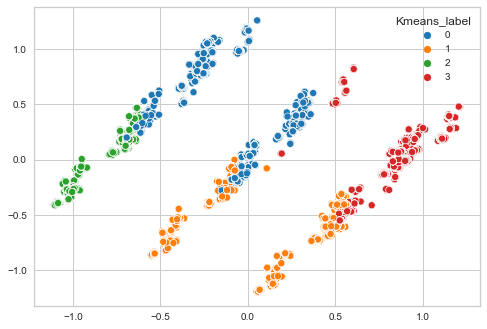

In [183]:
sns.scatterplot(X_PCA_2[:,0],X_PCA_2[:,1],hue=final_df["Kmeans_label"],palette='tab10')

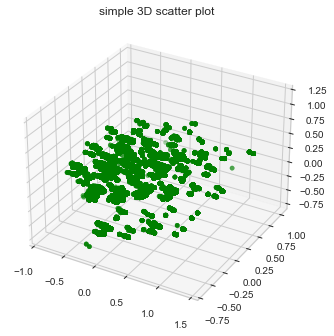

In [169]:
ax = plt.axes(projection ="3d")
ax.scatter3D(X_PCA[:,4], X_PCA[:,5], X_PCA[:,6], color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [170]:
merged_data.keys()

Index(['listing_id', 'id_x', 'reviewer_id', 'comments', 'neg', 'neu', 'pos',
       'compound', 'labels', 'id_y', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'bedrooms', 'amenities',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'reviews_per_month', 'Total_Cost', 'Total_Capacity'],
      dtype='object')

## Agglomerative

MemoryError: unable to allocate array data.

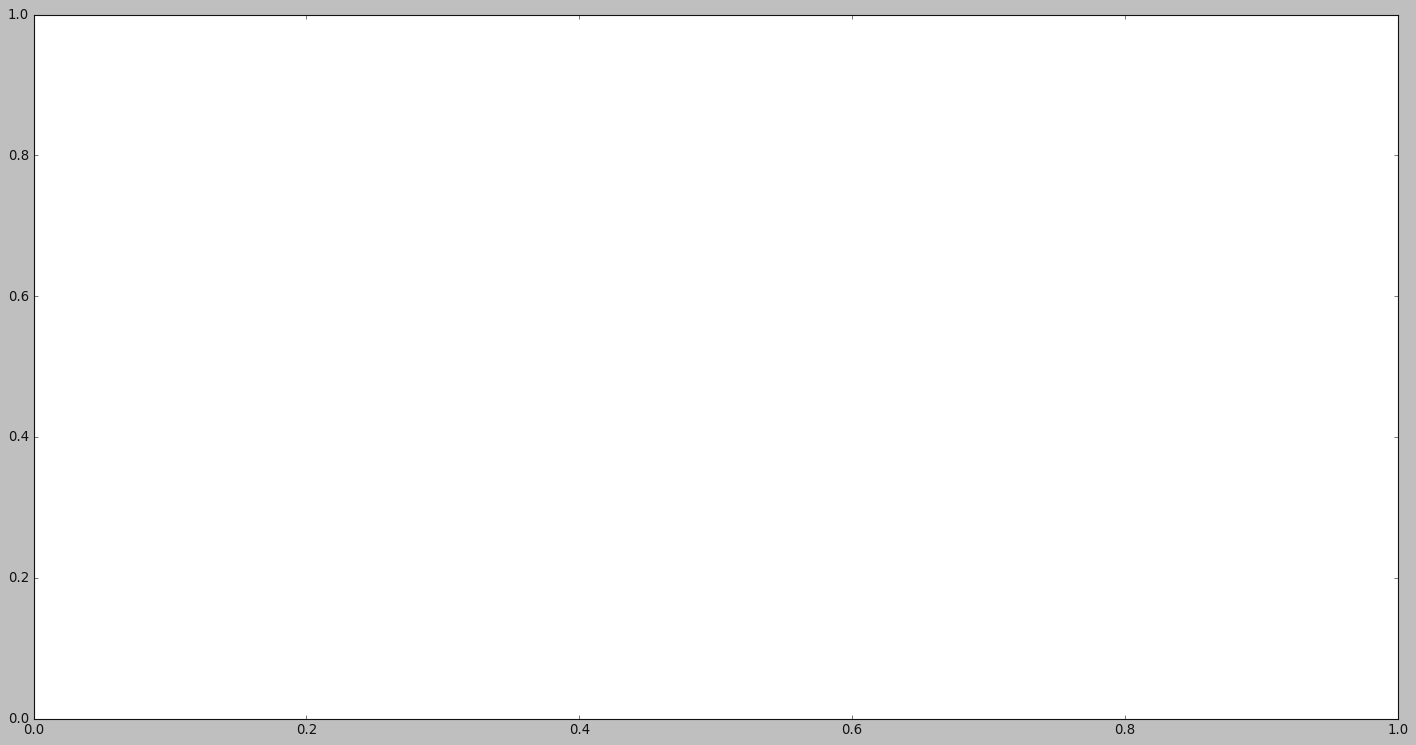

In [184]:
import scipy.cluster.hierarchy as sch
plt.style.use('classic')
plt.subplots(figsize=(22,11))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=200, color='r', linestyle='--')
plt.show() 

In [201]:
scaled_data

array([[0.88513514, 0.        , 0.14285714, ..., 0.        , 0.        ,
        0.        ],
       [0.99309197, 0.        , 0.14285714, ..., 0.        , 0.        ,
        0.        ],
       [0.96621622, 0.        , 0.14285714, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9325837 , 0.        , 0.28571429, ..., 0.        , 1.        ,
        0.        ],
       [0.83930012, 0.        , 0.28571429, ..., 0.        , 1.        ,
        0.        ],
       [0.98920936, 0.05263158, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [205]:
final_df = final_df.reset_index()

In [213]:
data

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,en
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,en
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",en
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,en
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,en
...,...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,en
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,en
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del...",es
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si...",en


In [215]:
data.reviewer_id.nunique()

75717

In [214]:
final_df

,index,compound,host_response_time,bedrooms,review_scores_value,instant_bookable,reviews_per_month,Total_Cost,Total_Capacity,room_typePrivate room,...,neighbourhood_group_cleansedRainier Valley,neighbourhood_group_cleansedSeward Park,neighbourhood_group_cleansedUniversity District,neighbourhood_group_cleansedWest Seattle,property_typeHouse,property_typeOther,cancellation_policymoderate,cancellation_policystrict,Kmeans_label,dbscan_label
0,0,0.7717,1,1.0,10.0,1,2.82,90.0,3,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0.9858,1,1.0,10.0,1,2.82,90.0,3,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0.9325,1,1.0,10.0,1,2.82,90.0,3,1,...,0,0,0,0,0,0,0,0,0,0
3,3,0.7579,1,1.0,10.0,1,2.82,90.0,3,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0.9738,1,1.0,10.0,1,2.82,90.0,3,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83572,83572,0.9460,1,2.0,9.0,1,1.15,310.0,7,0,...,0,0,0,0,0,0,1,0,0,127
83573,83573,0.9360,1,2.0,9.0,1,1.15,310.0,7,0,...,0,0,0,0,0,0,1,0,0,127
83574,83574,0.8658,1,2.0,9.0,1,1.15,310.0,7,0,...,0,0,0,0,0,0,1,0,0,127
83575,83575,0.6808,1,2.0,9.0,1,1.15,310.0,7,0,...,0,0,0,0,0,0,1,0,0,127


In [207]:
final_df.iloc[:1000,:5]

,index,compound,host_response_time,bedrooms,review_scores_value
0,0,0.7717,1,1.0,10.0
1,1,0.9858,1,1.0,10.0
2,2,0.9325,1,1.0,10.0
3,3,0.7579,1,1.0,10.0
4,4,0.9738,1,1.0,10.0
...,...,...,...,...,...
995,995,0.8316,24,1.0,9.0
996,996,0.9349,24,1.0,9.0
997,997,0.8481,24,1.0,9.0
998,998,0.9516,24,1.0,9.0


In [212]:
Agg = AgglomerativeClustering(n_clusters=4, linkage = 'ward')
agg_labels= Agg.fit_predict(X_PCA)

MemoryError: Unable to allocate 26.0 GiB for an array with shape (3492515676,) and data type float64

In [210]:
pd.Series(agg_labels).value_counts()

0    354
2    291
1    215
3    140
dtype: int64

In [186]:
len(X_PCA)

83577

In [189]:
X_PCA

array([[ 5.54587068e-03,  1.33329174e-01,  5.74725391e-01, ...,
         2.22666974e-02, -3.54404290e-02,  5.24107054e-02],
       [ 5.04252107e-03,  1.33195964e-01,  5.74421159e-01, ...,
         2.47721291e-02, -3.28346825e-02, -5.31595954e-02],
       [ 5.16782949e-03,  1.33229127e-01,  5.74496897e-01, ...,
         2.41484041e-02, -3.34833808e-02, -2.68779652e-02],
       ...,
       [ 3.69389971e-03,  1.16969448e+00,  8.25392243e-02, ...,
         3.69366916e-02, -5.52017538e-02,  1.05934403e-03],
       [ 4.12883515e-03,  1.16980959e+00,  8.28021055e-02, ...,
         3.47717926e-02, -5.74533330e-02,  9.22807623e-02],
       [-2.53958868e-01,  7.82700257e-01,  1.29919225e-01, ...,
        -7.66090539e-02,  5.37877596e-02, -5.86509665e-02]])

In [200]:
epsilon =  np.linspace(0.1,1,10)
size = range(20,50)
for i in epsilon:
    for j in size:
        dbscan = DBSCAN(eps = i,min_samples = j)
        labels_dbscan = dbscan.fit_predict(X_PCA)
        clust_points = len(dbscan.core_sample_indices_)
        noise = len(data)-len(dbscan.core_sample_indices_)
        if clust_points > 1.5*noise:
            print(f"For Epsilon = {round(i,2)} and min_cluster_size = {j} the clusters are {np.unique(labels_dbscan)}")
            print("Total number of data points assigned to clusters = ", clust_points)
            print("Total number of data points assigned to noise = ", noise)
            print("\n")

For Epsilon = 0.1 and min_cluster_size = 20 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

For Epsilon = 0.1 and min_cluster_size = 23 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

For Epsilon = 0.1 and min_cluster_size = 27 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

For Epsilon = 0.1 and min_cluster_size = 31 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

For Epsilon = 0.1 and min_cluster_size = 35 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

For Epsilon = 0.1 and min_cluster_size = 40 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

For Epsilon = 0.1 and min_cluster_size = 45 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

For Epsilon = 0.2 and min_cluster_size = 20 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

For Epsilon = 0.2 and min_cluster_size = 24 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

For Epsilon = 0.2 and min_cluster_size = 29 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

For Epsilon = 0.2 and min_cluster_size = 34 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

For Epsilon = 0.2 and min_cluster_size = 40 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

For Epsilon = 0.2 and min_cluster_size = 46 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

For Epsilon = 0.3 and min_cluster_size = 22 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

For Epsilon = 0.3 and min_cluster_size = 27 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

For Epsilon = 0.3 and min_cluster_size = 33 the clusters are [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

KeyboardInterrupt: 

In [194]:
dbscan= DBSCAN()
final_df["dbscan_label"]= dbscan.fit_predict(scaled_data)

In [195]:
final_df["dbscan_label"].value_counts()

24     4230
21     2463
36     2177
38     2012
58     1567
       ... 
428       5
426       5
366       5
408       5
247       5
Name: dbscan_label, Length: 496, dtype: int64